In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.sparse as sp
from IPython.display import clear_output

In [2]:
# Dense SPD
n = 10
A = np.random.rand(n,n)
A = A @ A.T

In [32]:
# Banded
n = 50
d = np.zeros((5, n))
d[0,:] = 4
d[1:5,:] = -1
nx = int(np.floor(np.sqrt(n)))
A = np.asarray(sp.spdiags(d, (0,-1,1,-nx,nx)).todense())

In [47]:
# Random sparse
A = np.asarray(sp.random(n, n, 0.25).todense())
A += 4*np.eye(n)

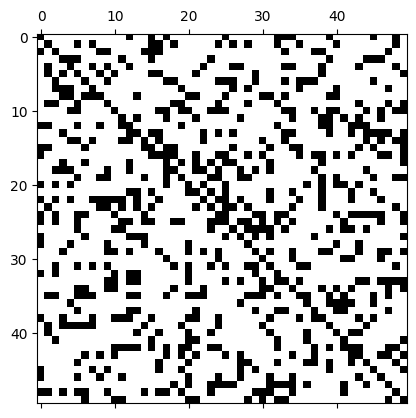

In [48]:
plt.spy(A)

In [49]:
S = A.copy()
L = np.eye(n)
U = A.copy()
i = 0

In [50]:
def step():
    global S
    global L
    global U
    global i
    
    alpha = S[0,0]

    a = S[0,1:]
    b = S[1:,0]
    C = S[1:,1:]

    L[(i+1):,i] = (1/alpha) * b

    U[i,i] = alpha
    U[i,(i+1):] = a
    U[(i+1):,i] = 0

    S = C - (1/alpha) * np.outer(a, b)
    U[(i+1):,(i+1):] = S

    i = i + 1

In [51]:
def plot_matrices():
    with out:
        figure, axis = plt.subplots(1, 2)

        axis[0].spy(L)
        axis[0].set_title("L")

        axis[1].spy(U)
        axis[1].set_title("U")

In [52]:
def click(_):
    step()
    with out:
        clear_output(True)
        plot_matrices()
        plt.show()

In [53]:
import ipywidgets as widgets

In [54]:
button = widgets.Button(description="Step")
button.on_click(click)
out = widgets.Output()

In [55]:
%matplotlib inline
display(button)
with out:
    clear_output(True)
    plot_matrices()
    plt.show()
out

Button(description='Step', style=ButtonStyle())

Output()